# **TAREA VISUALIZACIÓN AVANZADA**

## **DATASET: Datos vehículos a la venta 2016 en UK**

En el presente trabajo se analizarán los datos de vehículos a la venta en 2016 en UK. Este dataset tiene ya 7 años pero sigue siendo válido para nuestro propósito, que es practicar la visualización y el storytelling.

La principal ventaja es que tiene una variable de grupo (o "factor") creada en español (la variable "Tipo") para facilitar los gráficos por tipo de vehículo.

*NOTA: Python Notebook realizado en Google Colab*

In [ ]:
# Instalamos paquetes si fuera necesario (por ejemplo, desactualizamos pandas para que funcione correctamente ggplot)

#!pip install pandas==1.3.3 ggplot

In [ ]:
# Importamos todas las librerías que utilizaremos para este análisis

import pandas as pd
import plotnine
from plotnine import *
from plotnine.data import mpg
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.cluster import KMeans

In [ ]:
# Carga de datos desde el repositorio de Github para evitar problemas a la hora de que se ejecute este notebook en otro ordenador

url = 'https://raw.githubusercontent.com/pedroconcejero/ucm_master_2023_PYTHON/main/vehiculos_UK_2016.csv'
df = pd.read_csv(url, sep='|')

In [ ]:
df.shape

(4490, 20)

In [ ]:
df.dtypes

Manufacturer             object
Model                    object
EngineCapacity            int64
FuelType                 object
MetricUrbanCold         float64
MetricExtraUrban        float64
MetricCombined          float64
ImperialUrbanCold       float64
ImperialExtraUrban      float64
ImperialCombined        float64
CO2gkm                    int64
FuelCost12000Miles        int64
EuroStandard              int64
NoiseLeveldBA           float64
EmissionsCOmgkm         float64
THCEmissionsmgkm        float64
EmissionsNOxmgkm        float64
THC+NOxEmissionsmgkm    float64
ParticulatesNo_mgkm     float64
Tipo                     object
dtype: object

In [ ]:
df.head()

,Manufacturer,Model,EngineCapacity,FuelType,MetricUrbanCold,MetricExtraUrban,MetricCombined,ImperialUrbanCold,ImperialExtraUrban,ImperialCombined,CO2gkm,FuelCost12000Miles,EuroStandard,NoiseLeveldBA,EmissionsCOmgkm,THCEmissionsmgkm,EmissionsNOxmgkm,THC+NOxEmissionsmgkm,ParticulatesNo_mgkm,Tipo
0,ABARTH,"500, 2012 onwards",1368,Petrol,7.9,4.9,6.0,35.8,57.6,47.1,139,1170,6,72.5,455.0,23.0,9.0,NaN,NaN,Gasolina
1,ABARTH,"500, 2012 onwards",1368,Petrol,7.6,4.7,5.8,37.2,60.1,48.7,134,1131,6,73.0,445.0,25.0,22.0,NaN,NaN,Gasolina
2,ABARTH,"500, 2012 onwards",1368,Petrol,7.9,4.9,6.0,35.8,57.6,47.1,139,1170,6,74.0,222.0,35.0,19.0,NaN,NaN,Gasolina
3,ABARTH,"500, 2012 onwards",1368,Petrol,7.6,4.7,5.8,37.2,60.1,48.7,134,1131,6,73.5,439.0,34.0,37.0,NaN,NaN,Gasolina
4,ABARTH,"500, 2012 onwards",1368,Petrol,7.9,4.9,6.0,35.8,57.6,47.1,139,1170,6,71.5,498.0,36.0,27.0,NaN,NaN,Gasolina


In [ ]:
df.describe(include = 'all')

,Manufacturer,Model,EngineCapacity,FuelType,MetricUrbanCold,MetricExtraUrban,MetricCombined,ImperialUrbanCold,ImperialExtraUrban,ImperialCombined,CO2gkm,FuelCost12000Miles,EuroStandard,NoiseLeveldBA,EmissionsCOmgkm,THCEmissionsmgkm,EmissionsNOxmgkm,THC+NOxEmissionsmgkm,ParticulatesNo_mgkm,Tipo
count,4490,4490,4490.000000,4490,4459.000000,4459.000000,4490.000000,4459.000000,4459.000000,4490.000000,4490.000000,4490.000000,4490.0,4490.000000,4490.000000,2230.000000,4490.000000,2289.000000,2293.000000,4490
unique,44,450,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
top,BMW,Coupe,NaN,Diesel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Diesel
freq,607,260,NaN,2274,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2274
mean,NaN,NaN,1991.111804,NaN,6.925252,4.790491,5.549042,45.364230,62.014891,55.120445,135.823163,1086.980401,6.0,71.302249,260.113007,41.636726,37.138886,80.458934,0.300039,NaN
std,NaN,NaN,828.057573,NaN,2.800404,1.224893,1.794549,12.962089,12.771535,15.869631,39.732306,348.519954,0.0,1.969812,143.096498,14.819350,18.805169,22.962894,0.331194,NaN
min,NaN,NaN,647.000000,NaN,0.000000,0.000000,0.600000,0.000000,0.000000,17.300000,13.000000,117.000000,6.0,66.000000,10.000000,4.000000,1.000000,19.000000,0.000000,NaN
25%,NaN,NaN,1499.000000,NaN,5.200000,4.000000,4.400000,36.700000,53.300000,46.300000,112.000000,867.000000,6.0,70.000000,156.000000,33.000000,23.000000,66.000000,0.060000,NaN
50%,NaN,NaN,1968.000000,NaN,6.100000,4.500000,5.100000,46.300000,62.800000,55.400000,127.000000,999.500000,6.0,71.000000,230.000000,41.000000,36.000000,81.000000,0.180000,NaN
75%,NaN,NaN,1997.000000,NaN,7.700000,5.300000,6.100000,54.300000,70.600000,64.200000,149.000000,1202.000000,6.0,73.000000,329.000000,49.000000,52.000000,97.000000,0.480000,NaN


In [ ]:
pd.set_option('display.max_columns', None)
df.describe(include = 'all')

,Manufacturer,Model,EngineCapacity,FuelType,MetricUrbanCold,MetricExtraUrban,MetricCombined,ImperialUrbanCold,ImperialExtraUrban,ImperialCombined,CO2gkm,FuelCost12000Miles,EuroStandard,NoiseLeveldBA,EmissionsCOmgkm,THCEmissionsmgkm,EmissionsNOxmgkm,THC+NOxEmissionsmgkm,ParticulatesNo_mgkm,Tipo
count,4490,4490,4490.000000,4490,4459.000000,4459.000000,4490.000000,4459.000000,4459.000000,4490.000000,4490.000000,4490.000000,4490.0,4490.000000,4490.000000,2230.000000,4490.000000,2289.000000,2293.000000,4490
unique,44,450,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
top,BMW,Coupe,NaN,Diesel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Diesel
freq,607,260,NaN,2274,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2274
mean,NaN,NaN,1991.111804,NaN,6.925252,4.790491,5.549042,45.364230,62.014891,55.120445,135.823163,1086.980401,6.0,71.302249,260.113007,41.636726,37.138886,80.458934,0.300039,NaN
std,NaN,NaN,828.057573,NaN,2.800404,1.224893,1.794549,12.962089,12.771535,15.869631,39.732306,348.519954,0.0,1.969812,143.096498,14.819350,18.805169,22.962894,0.331194,NaN
min,NaN,NaN,647.000000,NaN,0.000000,0.000000,0.600000,0.000000,0.000000,17.300000,13.000000,117.000000,6.0,66.000000,10.000000,4.000000,1.000000,19.000000,0.000000,NaN
25%,NaN,NaN,1499.000000,NaN,5.200000,4.000000,4.400000,36.700000,53.300000,46.300000,112.000000,867.000000,6.0,70.000000,156.000000,33.000000,23.000000,66.000000,0.060000,NaN
50%,NaN,NaN,1968.000000,NaN,6.100000,4.500000,5.100000,46.300000,62.800000,55.400000,127.000000,999.500000,6.0,71.000000,230.000000,41.000000,36.000000,81.000000,0.180000,NaN
75%,NaN,NaN,1997.000000,NaN,7.700000,5.300000,6.100000,54.300000,70.600000,64.200000,149.000000,1202.000000,6.0,73.000000,329.000000,49.000000,52.000000,97.000000,0.480000,NaN


A continuación vamos a ver un gráfico en el que veremos la **cantidad de vehículos a la venta según cuál sea su combustible**

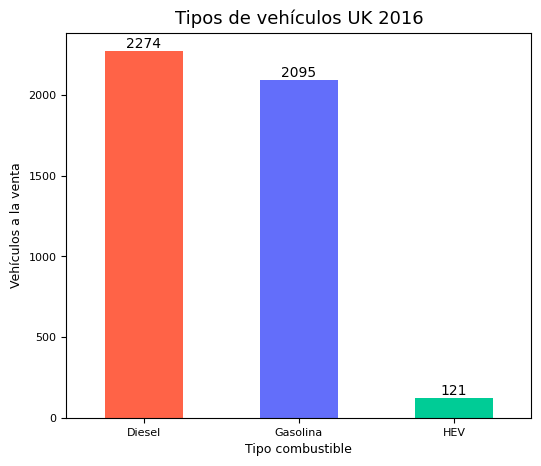

In [ ]:
count_classes = pd.value_counts(df['Tipo'], sort = True)

colors =['tomato', '#636efa', '#00cc96']

plt.figure(figsize=(6, 5))  # tamaño de la figura
ax = count_classes.plot(kind='bar', rot=0, color=colors, fontsize = 8)
plt.title("Tipos de vehículos UK 2016", fontsize = 13)
plt.xlabel("Tipo combustible", fontsize=9)
plt.ylabel("Vehículos a la venta", fontsize=9)

# Añadir labels con el total a las barras
for i, v in enumerate(count_classes):
    ax.text(i, v, str(v), ha='center', va='bottom')

Podemos ver que en 2016 los combustibles Diesel y Gasolina son los claros predominantes en el mercado, ambos muy igualados en número, y muy por delante de los que son Híbridos Eléctricos (HEV). Vamos a realizar un gráfico en el que nos muestre el **porcentaje que tiene cada combustible sobre en el total de vehículos a la venta**, para ver qué cuota de mercado del mercado le gana el Diesel a la Gasolina.

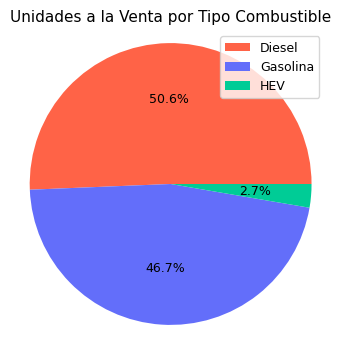

In [ ]:
count_classes = pd.value_counts(df['Tipo'], sort=True)

labels = count_classes.index  # labels únicas
sizes = count_classes.values  # cuenta de vehículos

plt.figure(figsize=(4,4)) # tamaño de la figura
plt.pie(sizes,
         #labels=labels, -- si queremos añadir las labels en cada trozo de tarta
        autopct='%1.1f%%', colors=colors, textprops={'fontsize': 9})
plt.title("Unidades a la Venta por Tipo Combustible", fontsize=11)
plt.axis('equal')  # Equal para asegurarnos de que el gráfico se dibuja como un círculo

plt.legend(labels=labels, loc='upper right', fontsize=9)

plt.show()

Ahora podemos ver que el Diesel supera a la Gasolina en aproximadamente un 4% del total de vehículos a la venta, y apreciamos mejor el detalle de que solo un 2,7% de los vehículos a la venta eran eléctricos en 2016, eso puede deberse a que estaban recién llegados al mercado. ¿Habrán ido aumentando hasta la actualidad?

A continuación vamos a analizar el **número de vehículos a la venta de cada tipo por fabricante**:

In [ ]:
# Calcular el número total de coches vendidos por fabricante y tipo
car_count = df.groupby(['Manufacturer', 'Tipo']).size().reset_index(name='TotalCars')

# Calcular el número total de coches vendidos por fabricante
fabricante_count = df.groupby(['Manufacturer']).size().reset_index(name='TotalCarsFabricante')

# Ordenar el DataFrame de fabricantes por 'TotalCars' de mayor a menor
fabricante_count = fabricante_count.sort_values(by='TotalCarsFabricante', ascending=False)
fabricante_count

,Manufacturer,TotalCarsFabricante
5,BMW,607
3,AUDI,514
24,MERCEDES-BENZ,436
12,FORD,362
41,VOLKSWAGEN,340
34,SKODA,223
40,VAUXHALL,206
25,MINI,167
17,KIA,152
33,SEAT,126


In [ ]:
# Crear un gráfico de barras interactivo
fig = px.bar(car_count, x='Manufacturer', y='TotalCars', color='Tipo',
             labels={'TotalCars': 'Número de Coches'},
             title='Número de Coches a la venta por Fabricante y Tipo',
             category_orders={"Manufacturer": fabricante_count["Manufacturer"]})

# Personalizar el título
fig.update_layout(
    title={
        'text': 'Número de Coches a la venta por Fabricante y Tipo',
        'y': 0.95,  # Ajusta esta posición vertical para centrar el título
        'x': 0.5,  # Ajusta esta posición horizontal para centrar el título
        'xanchor': 'center',
        'yanchor': 'top',
        'font': {'size': 18}  # Tamaño de fuente
        }
)

# Mostrar el gráfico
fig.show()

En este gráfico podemos ver que los fabricantes que más vehículos tenían a la venta en 2016 fueron BMW (607), Audi (514) y Mercedes-benz (436).

**La proporción de vehículos de cada tipo observada en estos fabricantes es prácticamente la misma que observábamos en el primer y segundo gráfico**, lo cual es coherente, ya que solo estos fabricantes ya suponen la mayoría de datos del dataset.

En cambio, **hay fabricantes que difieren** de esta distribución por tipo de combustible, por ejemplo:
- apuestan por el HEV más de lo que lo hace la mayoría, como Toyota y Lexus.
- apuestan casi únicamente por la Gasolina, como Porsche, McLaren, Smart, Aston Martin...
- apuestan casi únicamente por el Diesel, como Volkswagen y SsanYong

## Tras haber explorado la distribución del mercado/fabricantes por tipo de combustible, vamos a examinar si este es un **MODELO CAUSAL**, analizando las relaciones entre distintos factores, tales como:

- Características del coche (potencia del motor) vs su consumo
- Características del coche (potencia del motor) vs su emisiones
- Características del coche (potencia del motor) vs su contaminación acústica

NOTA: Vamos a crear 3 ggplots para visualizar las 3 relaciones que nos interesan, y posteriormente vamos a unificarlas horizontalmente para que sea más fácil compararlas y poder llegar a ver causalidades:

In [ ]:
colores = ['tomato', '#636efa','#00cc96']

plot1 = (
            ggplot(df)  # What data to use
            + aes(x = 'EngineCapacity',
                  y = 'EmissionsCOmgkm',
                color = 'Tipo')  # What variable to use
            + geom_smooth(method = 'lowess')   # Geometric object to use for drawing
            + facet_grid(facets = ". ~ Tipo")
            + scale_color_manual(values=colores)
          + ggtitle('Potencia vs Emisiones')
        )

plot4 = (
            ggplot(df)  # What data to use
            + aes(x = 'EngineCapacity',
                  y = 'EmissionsCOmgkm',
                color = 'Tipo')  # What variable to use
            + facet_grid(facets = ". ~ Tipo")
            + geom_point()
            + scale_color_manual(values=colores)
          + ggtitle('')
        )

In [ ]:
plot2 = (
          ggplot(df)  # What data to use
          + aes(x = 'EngineCapacity',
                y = 'NoiseLeveldBA',
              color = 'Tipo')  # What variable to use
          + geom_smooth(method = 'lowess')   # Geometric object to use for drawing
          + facet_grid(facets = ". ~ Tipo")
          + scale_color_manual(values=colores)
          + ggtitle('Potencia vs Ruido')
        )

plot5 = (
          ggplot(df)  # What data to use
          + aes(x = 'EngineCapacity',
                y = 'NoiseLeveldBA',
              color = 'Tipo')  # What variable to use
          + facet_grid(facets = ". ~ Tipo")
          + geom_point()
          + scale_color_manual(values=colores)
          + ggtitle('')
        )

In [ ]:
plot3 = (
          ggplot(df)  # What data to use
          + aes(x = 'EngineCapacity',
                y = 'MetricCombined',
              color = 'Tipo')  # What variable to use
          + geom_smooth(method = 'lowess')   # Geometric object to use for drawing
          + facet_grid(facets = ". ~ Tipo")
          + scale_color_manual(values=colores)
          + ggtitle('Potencia vs Consumo')
        )

plot6 = (
          ggplot(df)  # What data to use
          + aes(x = 'EngineCapacity',
                y = 'MetricCombined',
              color = 'Tipo')  # What variable to use
          + facet_grid(facets = ". ~ Tipo")
          + geom_point()
          + scale_color_manual(values=colores)
          + ggtitle('')
        )

He intentado crear el dashboard con la librería Gleam, pero me da error el urlparse y no he podido solucionarlo, por lo que lo haré con gridspec:

/usr/local/lib/python3.10/dist-packages/plotnine/ggplot.py:587: PlotnineWarning:

Saving 6.4 x 4.8 in image.

/usr/local/lib/python3.10/dist-packages/plotnine/ggplot.py:588: PlotnineWarning:

Filename: plot1.png

/usr/local/lib/python3.10/dist-packages/plotnine/stats/smoothers.py:330: PlotnineWarning:

Confidence intervals are not yet implemented for lowess smoothings.

/usr/local/lib/python3.10/dist-packages/plotnine/stats/smoothers.py:330: PlotnineWarning:

Confidence intervals are not yet implemented for lowess smoothings.

/usr/local/lib/python3.10/dist-packages/plotnine/stats/smoothers.py:330: PlotnineWarning:

Confidence intervals are not yet implemented for lowess smoothings.

/usr/local/lib/python3.10/dist-packages/plotnine/ggplot.py:587: PlotnineWarning:

Saving 6.4 x 4.8 in image.

/usr/local/lib/python3.10/dist-packages/plotnine/ggplot.py:588: PlotnineWarning:

Filename: plot2.png

/usr/local/lib/python3.10/dist-packages/plotnine/stats/smoothers.py:330: PlotnineWarning:

Con

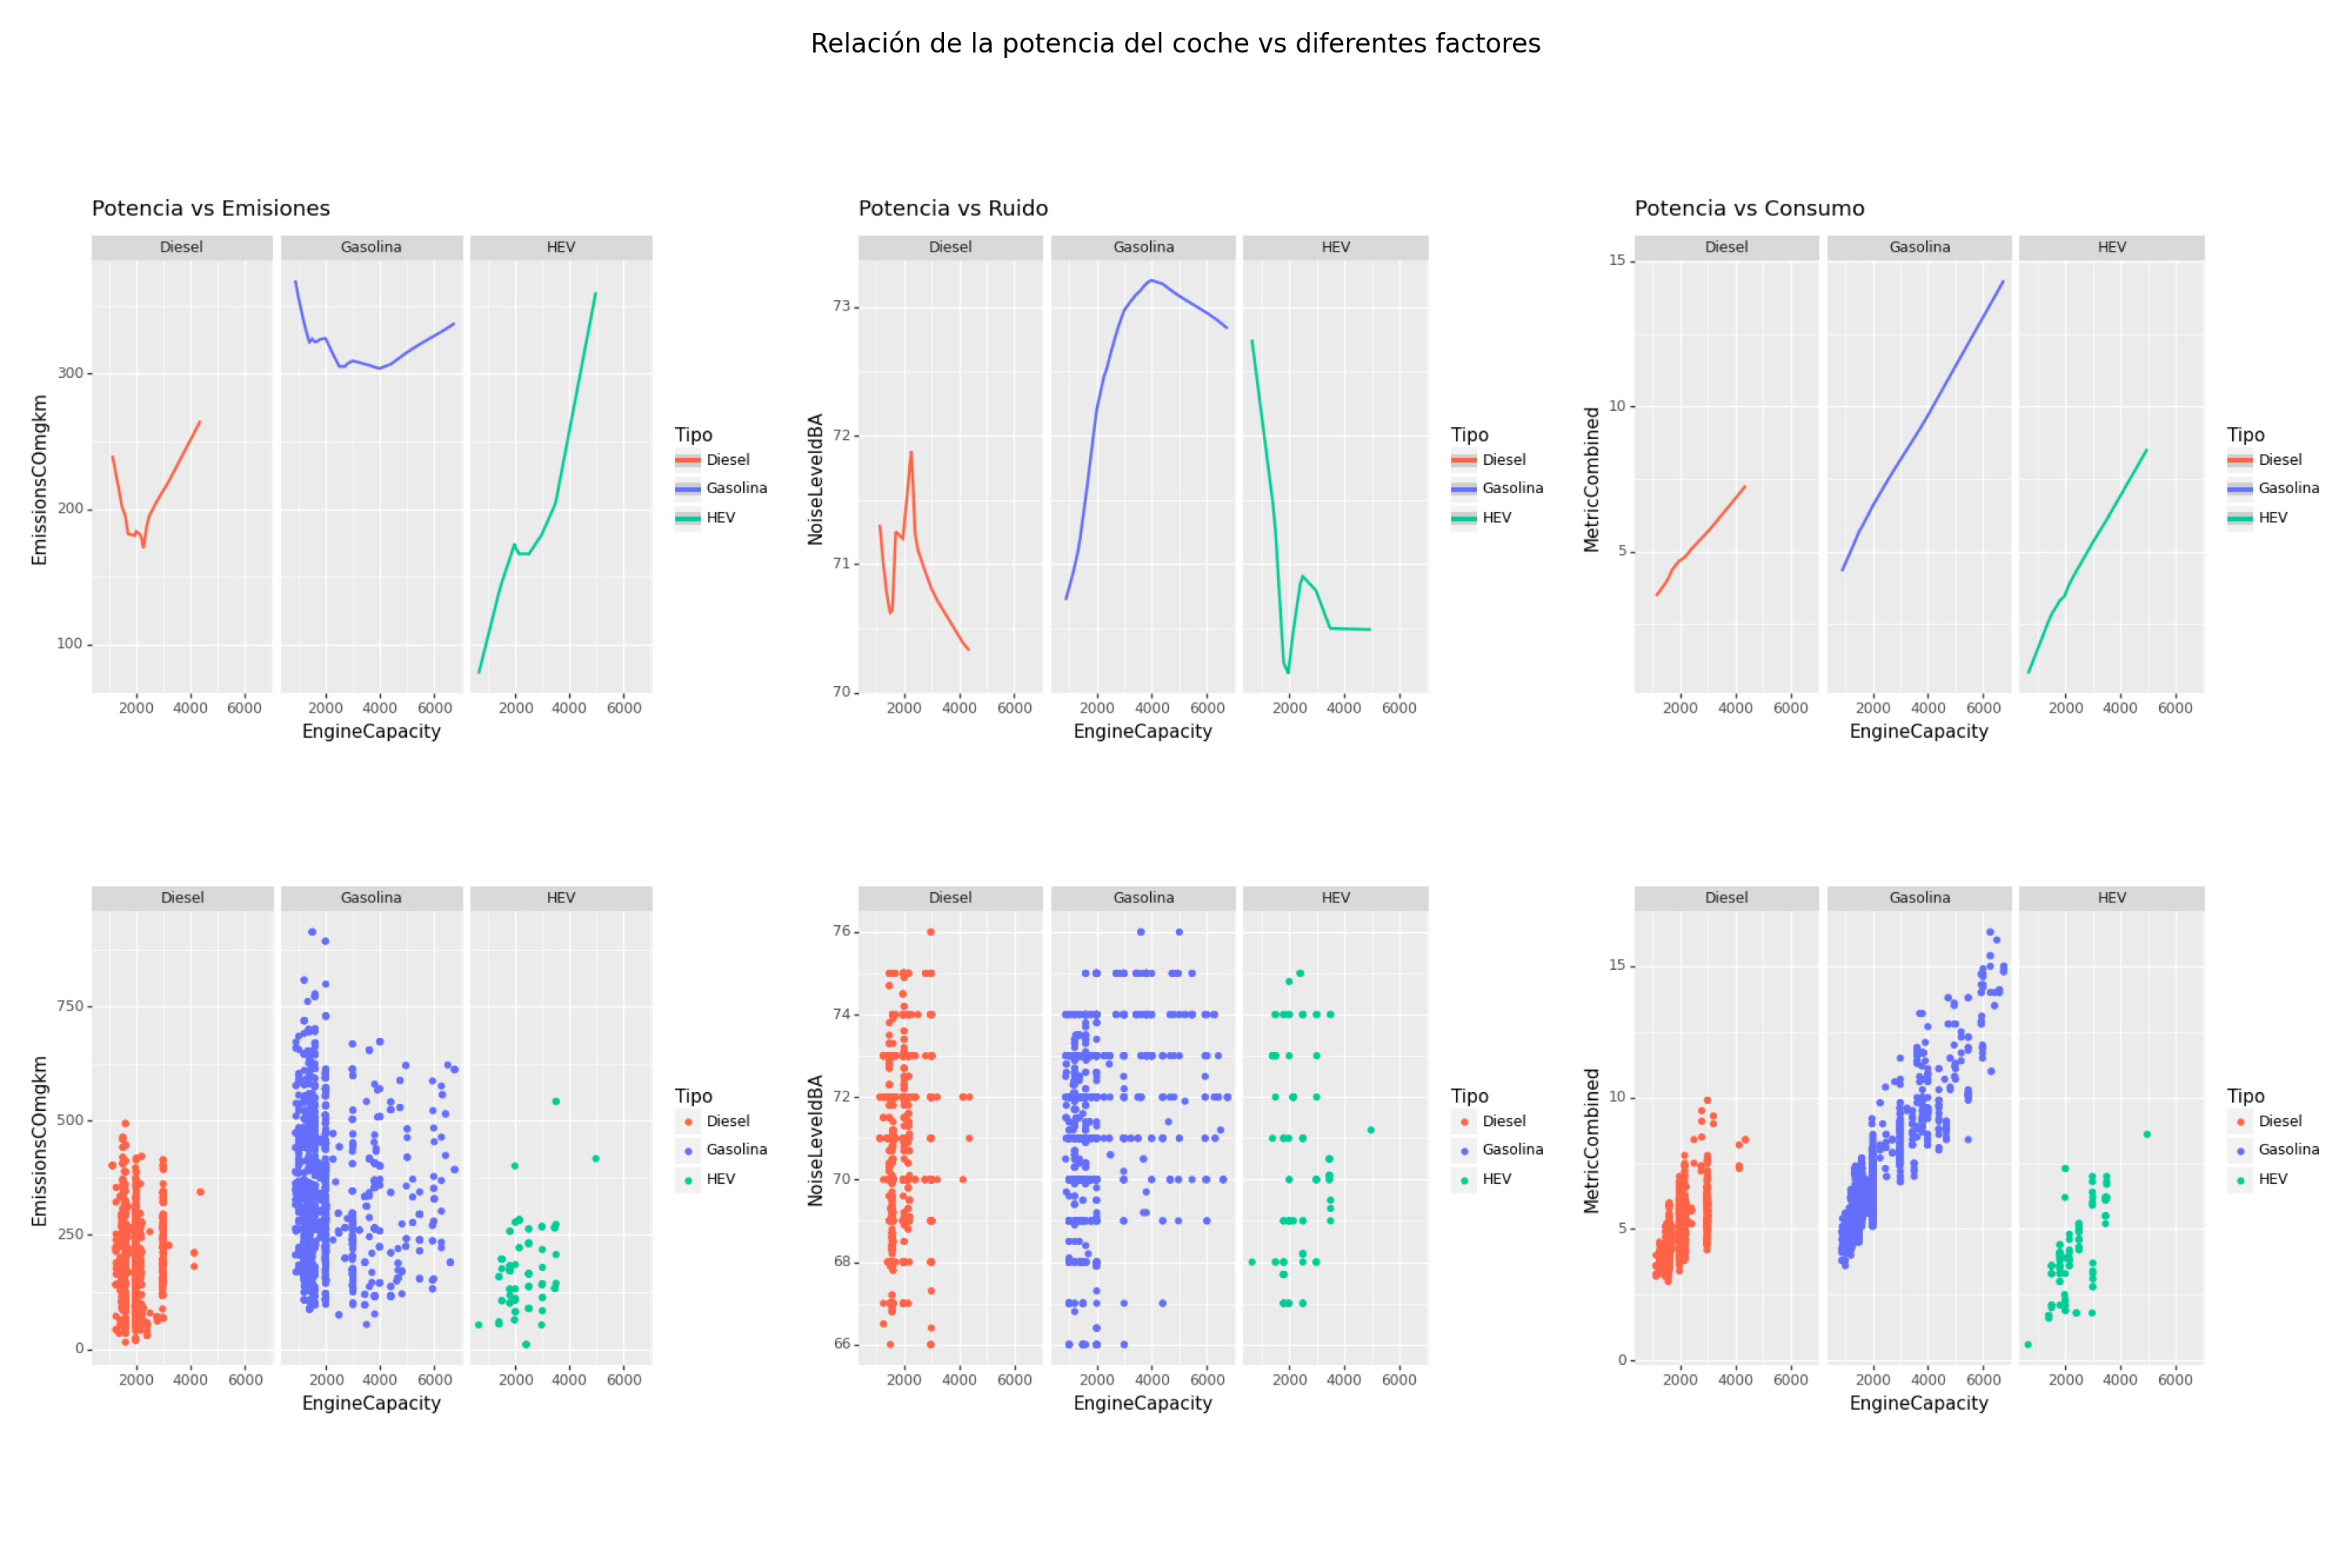

In [ ]:
# Guardar los gráficos de ggplot como imágenes
ggsave(plot1, filename="plot1.png")
ggsave(plot2, filename="plot2.png")
ggsave(plot3, filename="plot3.png")
ggsave(plot4, filename="plot4.png")
ggsave(plot5, filename="plot5.png")
ggsave(plot6, filename="plot6.png")

# Crear una figura con una cuadrícula de 2 filas y 3 columnas
fig = plt.figure(figsize=(15, 10))
gs = gridspec.GridSpec(2, 3)

# Mostrar los primeros seis gráficos
for i in range(6):
    image = Image.open(f"plot{i + 1}.png")
    ax = plt.subplot(gs[i])
    ax.imshow(np.asarray(image))
    #ax.set_title(f"Gráfico {i + 1}")
    ax.axis('off')

# Añadir un título a toda la figura
fig.suptitle("Relación de la potencia del coche vs diferentes factores")

# Ajustar automáticamente el espaciado
plt.tight_layout()

# Mostrar los seis gráficos uno debajo del otro
plt.show()

Debido a que no hay los mismos registros de cada cilindradra de motor y tipo de combustible, tenemos más riqueza de información en unos casos que en otros (por ejemplo, mientras que de una cilindrada tenemos varios registros con varias emisiones, en otras cilindradras solo disponemos de un dato de emisiones)

Es por esto que los gráficos que vemos en la parte superior del panel son puramente orientativos, y en nos apoyaremos en los de la parte inferior para dar más contexto sobre esa información.

Un detalle que podemos ver de primeras, es que, pese a que los vehículos con combustibles diésel eran los más frecuentes en este dataset, no tenemos datos de motores diésel de alta cilindrada (superiores a 5000), a diferencia de los gasolina, que tienen un mayor rango de cilindrada.

#### **POTENCIA VS EMISIONES:**

Lo que podemos apreciar en el gráfico es que en diesel y gasolina, **las emisiones son prácticamente independientes de la potencia del motor**. En los HEV se puede apreciar una ligera relación directa entre ambas, pero es debido a outliers, además tenemos muy pocos datos de coches con alta cilindrada eléctricos, al igual que nos pasa con los de diesel.
Igualmente, podemos ver que los HEV producen menos emisiones para las mismas cilindradas que cualquiera de los otros dos combustibles.

Lo que sí podemos apreciar es que los coches de **gasolina producen más emisiones por km que los de diésel y que los híbridos**, en igualdad de condiciones en cuanto a la potencia del motor.

#### **POTENCIA VS RUIDO:**

Vemos que la **contaminación acústica producida por los coches de los 3 tipos NO viene explicada de la potencia del motor**, al contrario de lo que se podría pensar. Podemos suponer que pese a que a más cilindrada más ruido producirá el motor, los fabricantes adaptan los materiales y las piezas para evitar que éstos produzcan más ruido que los coches con menos cilindrada.

Además, vemos que en estos registros los **coches híbridos producen prácticamente la misma contaminación acústica que el resto de tipos de coches**.


#### **POTENCIA VS CONSUMO:**

A diferencia de las variables anteriores, vemos claramente que **el consumo SÍ está directamente relacionado con la potencia del motor.**

Lo que podemos ver en el gráfico es que los motores que menos consumen son los híbridos, seguidos de los diésel y los gasolina.


## **CONCLUSIÓN:**

Tras todo este análisis, podemos llegar a la conclusión de que la potencia del motor y el combustible sí que están directamente relacionados con el consumo del coche, pero que hay otros factores a nivel mecánico que son los que verdaderamente influyen en la contaminación que producen los vehículos más allá del combustible o de la potencia del motor, ya sean mejores catalizadores y materiales de insonorización acústica, que dependen más del modelo del coche y de su ingeniería que de la potencia del motor y del combustible que utilice.


A continuación quería continuar mi análisis viendo si el hecho de que el **motor estuviera frío y en ciudad afectaba a las emisiones** del mismo, pero en el dataset solo disponemos del dato del consumo en frío, en caliente y la media de los dos (MetricCombined) que es el que he utilizado para el gráfico anterior.

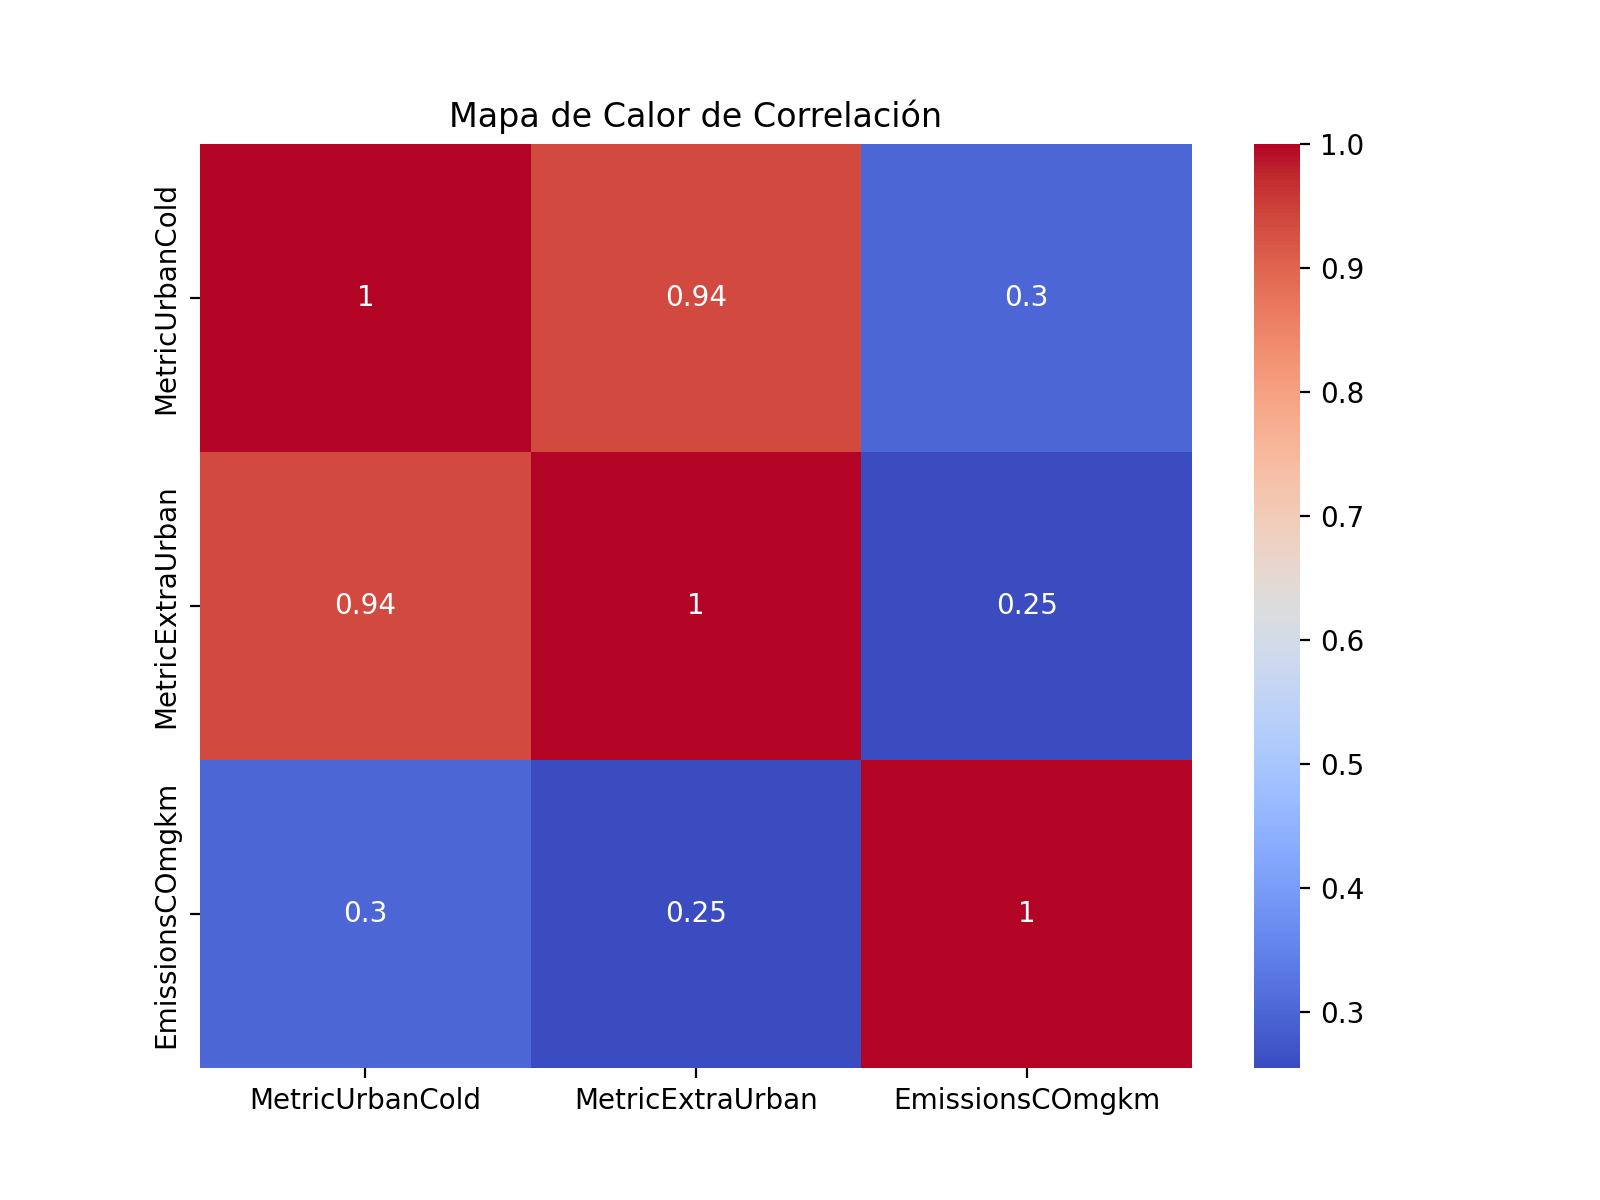

In [ ]:
# Calcula la matriz de correlación
correlation_matrix = df[['MetricUrbanCold', 'MetricExtraUrban', 'EmissionsCOmgkm']].corr()

# Tamaño personalizado para el mapa de calor de correlación
plt.figure(figsize=(8, 6))  # Ancho x Altura en pulgadas

# Crea un mapa de calor de correlación
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Mapa de Calor de Correlación')
plt.show()

Como podemos ver en la matriz de correlación, no podemos relacionar las emisiones el nivel de combustible que consume en frío. Solamente están relacionados el consumo en frío y la evolución del consumo en caliente.

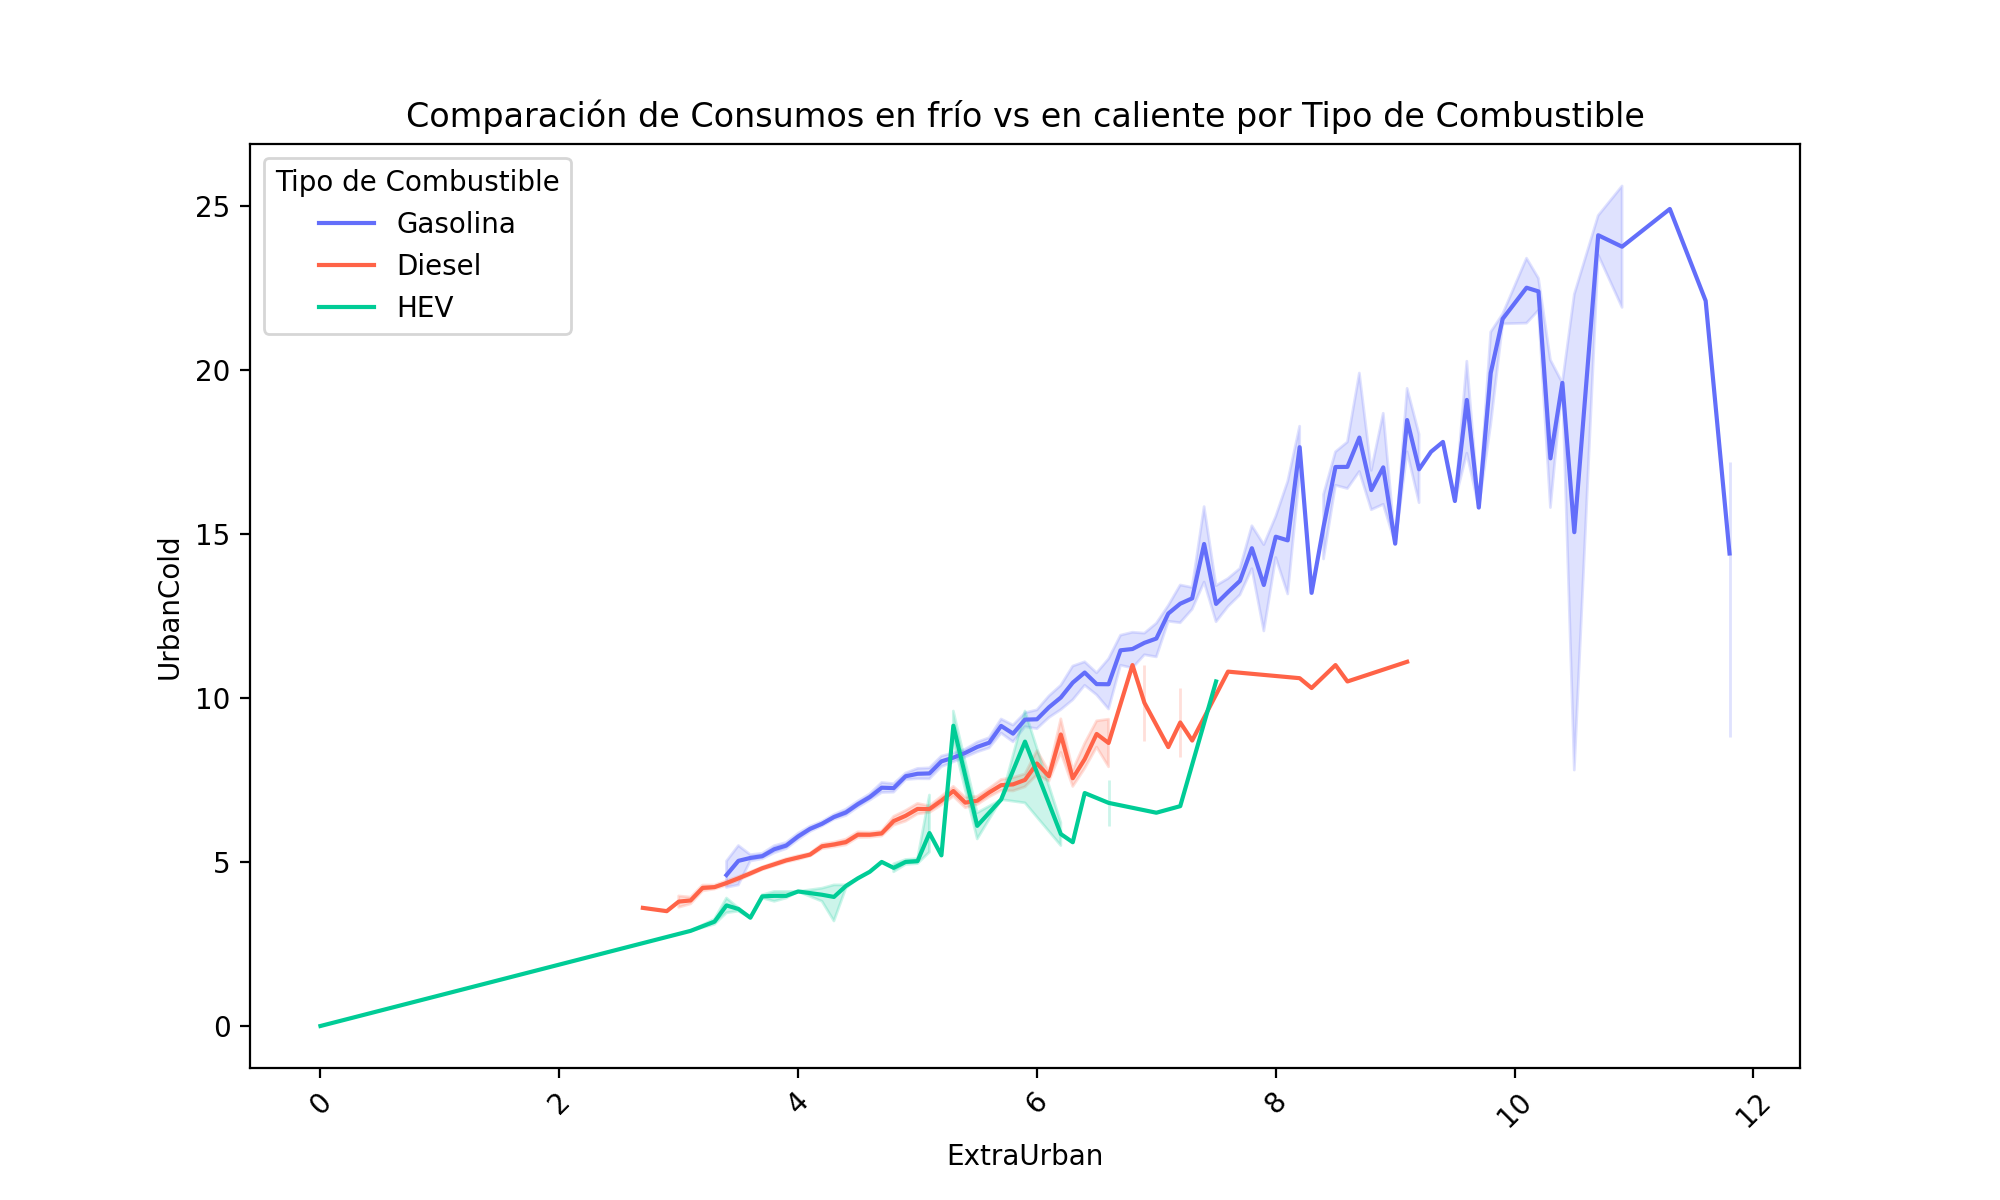

In [ ]:
# Crear un gráfico de líneas
plt.figure(figsize=(10, 6))  # Ajusta el tamaño del gráfico según tus preferencias

colores = {'Gasolina': '#636efa', 'Diesel': 'tomato', 'HEV': '#00cc96'}

# Trama de las líneas para MetricUrbanCold
sns.lineplot(data=df, x='MetricExtraUrban', y='MetricUrbanCold', hue='Tipo', palette=colores)

# Personalizar el gráfico
plt.xlabel('ExtraUrban')
plt.ylabel('UrbanCold')
plt.title('Comparación de Consumos en frío vs en caliente por Tipo de Combustible')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para una mejor legibilidad

# Mostrar la leyenda
plt.legend(title='Tipo de Combustible')

# Mostrar el gráfico
plt.show()

Podemos ver que al combustible al que más le **afecta la temperatura a la que esté su motor/tiempo que lleve funcionando el coche a su consumo es a la gasolina** (es la línea con más pendiente general). El diésel y el híbrido apenas tienen diferencias de consumo entre motor en frío/caliente.